In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

In [2]:
from __future__ import division


In [3]:
import scipy.stats as stats
import seaborn as sns

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


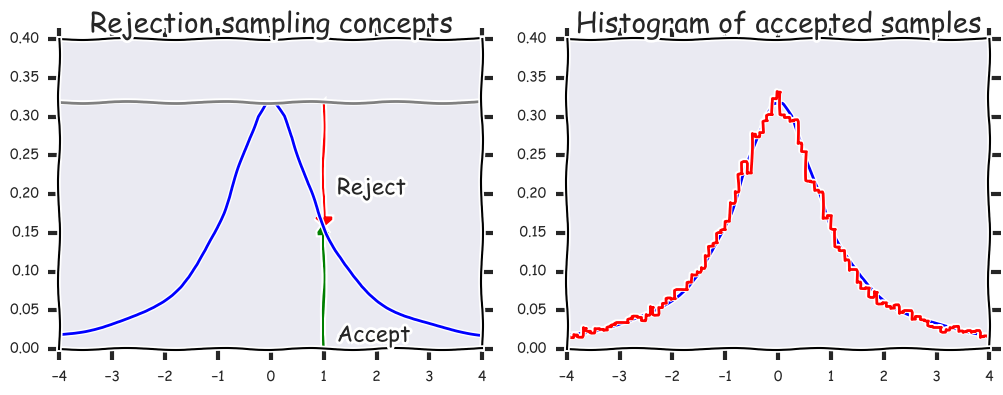

In [12]:
# Suppose we want to sample from the (truncated) T distribution witb 10 degrees of freedom
# We use the uniform as a proposal distibution (highly inefficient)

x = np.linspace(-4, 4)

df = 10
dist = stats.cauchy()
upper = dist.pdf(0)

with plt.xkcd():
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(x, dist.pdf(x))
    plt.axhline(upper, color='grey')
    px = 1.0
    plt.arrow(px,0,0,dist.pdf(1.0)-0.01, linewidth=1,
              head_width=0.2, head_length=0.01, fc='g', ec='g')
    plt.arrow(px,upper,0,-(upper-dist.pdf(px)-0.01), linewidth=1,
              head_width=0.3, head_length=0.01, fc='r', ec='r')
    plt.text(px+.25, 0.2, 'Reject', fontsize=16)
    plt.text(px+.25, 0.01, 'Accept', fontsize=16)
    plt.axis([-4,4,0,0.4])
    plt.title('Rejection sampling concepts', fontsize=20)

    plt.subplot(122)
    n = 100000
    # generate from sampling distribution
    u = np.random.uniform(-4, 4, n)
    # accept-reject criterion for each point in sampling distribution
    r = np.random.uniform(0, upper, n)
    # accepted points will come from target (Cauchy) distribution
    v = u[r < dist.pdf(u)]

    plt.plot(x, dist.pdf(x), linewidth=2)

    # Plot scaled histogram
    factor = dist.cdf(4) - dist.cdf(-4)
    hist, bin_edges = np.histogram(v, bins=100, normed=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
    plt.step(bin_centers, factor*hist, linewidth=2)

    plt.axis([-4,4,0,0.4])
    plt.title('Histogram of accepted samples', fontsize=20);

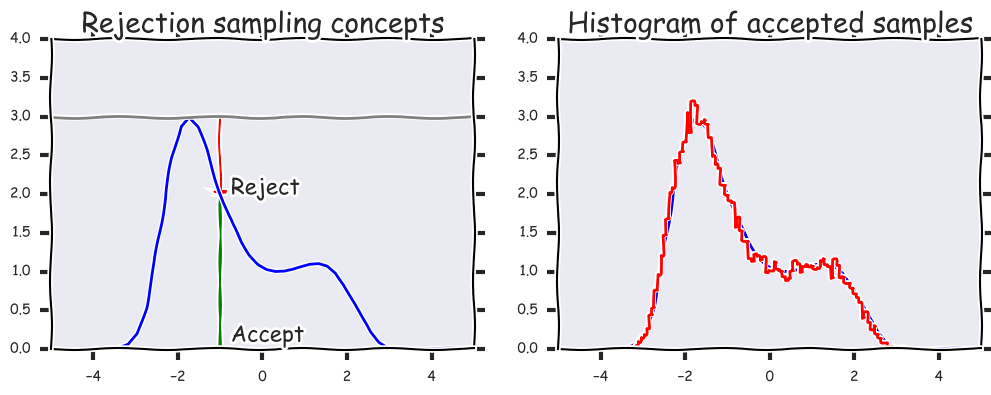

In [28]:
# Suppose we want to sample from the (truncated) T distribution witb 10 degrees of freedom
# Weuse the uniform as a proposal distibution (highly inefficient)

x = np.linspace(-5, 5)

def f(x):
    return np.exp(0.4*(x-0.4)**2-0.08*x**4)

df = 10
upper = f(-1.75233)

with plt.xkcd():
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(x, f(x))
    plt.axhline(upper, color='grey')
    px = -1.0
    plt.arrow(px,0,0,f(px)-0.01, linewidth=1,
              head_width=0.2, head_length=0.01, fc='g', ec='g')
    plt.arrow(px,upper,0,-(upper-f(px)-0.01), linewidth=1,
              head_width=0.3, head_length=0.01, fc='r', ec='r')
    plt.text(px+.25, 2, 'Reject', fontsize=16)
    plt.text(px+.25, 0.1, 'Accept', fontsize=16)
    plt.axis([-5,5,0,4])
    plt.title('Rejection sampling concepts', fontsize=20)

    plt.subplot(122)
    n = 100000
    # generate from sampling distribution
    u = np.random.uniform(-5, 5, n)
    # accept-reject criterion for each point in sampling distribution
    r = np.random.uniform(0, upper, n)
    # accepted points will come from target (Cauchy) distribution
    v = u[r < f(u)]

    plt.plot(x, f(x), linewidth=2)

    # Plot scaled histogram
    factor = 7.85218 # Integrated value of f(x) from -5 to 5. 
    hist, bin_edges = np.histogram(v, bins=100, normed=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
    plt.step(bin_centers, factor*hist, linewidth=2)

    plt.axis([-5,5,0,4])
    plt.title('Histogram of accepted samples', fontsize=20);

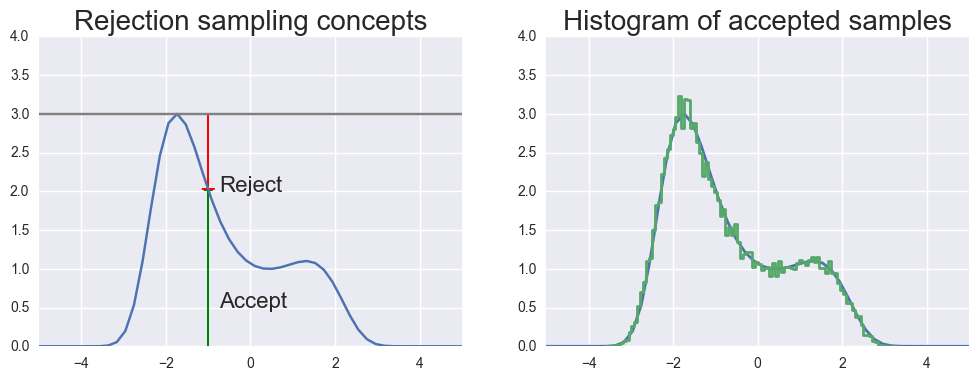

In [29]:
# Suppose we want to sample from the (truncated) T distribution witb 10 degrees of freedom
# Weuse the uniform as a proposal distibution (highly inefficient)

x = np.linspace(-5, 5)

def f(x):
    return np.exp(0.4*(x-0.4)**2-0.08*x**4)

df = 10
upper = f(-1.75233)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, f(x))
plt.axhline(upper, color='grey')

px = -1.0

plt.arrow(px,0,0,f(px)-0.01, linewidth=1,
          head_width=0.2, head_length=0.01, fc='g', ec='g')

plt.arrow(px,upper,0,-(upper-f(px)-0.01), linewidth=1,
          head_width=0.3, head_length=0.01, fc='r', ec='r')
    
plt.text(px+.25, 2, 'Reject', fontsize=16)
plt.text(px+.25, 0.5, 'Accept', fontsize=16)

plt.axis([-5,5,0,4])

plt.title('Rejection sampling concepts', fontsize=20)


plt.subplot(122)

n = 100000

# generate from sampling distribution

u = np.random.uniform(-5, 5, n)

# accept-reject criterion for each point in sampling distribution

r = np.random.uniform(0, upper, n)

# accepted points will come from target (Cauchy) distribution

v = u[r < f(u)]


    
plt.plot(x, f(x), linewidth=2)

    

# Plot scaled histogram

factor = 7.85218 # Integrated value of f(x) from -5 to 5. 

hist, bin_edges = np.histogram(v, bins=100, normed=True)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

plt.step(bin_centers, factor*hist, linewidth=2)



plt.axis([-5,5,0,4])

plt.title('Histogram of accepted samples', fontsize=20);

In [7]:
dist.cdf(4)

0.9220

In [8]:
dist.cdf(-4)

0.0780

In [10]:
dist

In [11]:
def f(x):
    return np.exp(0.4*(x-0.4)**2-0.08*x**4)
f(-1.75233)

3.0002